In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('responses.csv')
meta_df = pd.read_csv('metadata.csv')

/tmp/ipykernel_6732/2331540268.py:1: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('responses.csv')


In [3]:
df.shape

(200000, 47)

In [4]:
df.columns

Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'languages'],
      dtype='object')

In [5]:
df = df[['full_name','html_url','languages','fork']]

In [6]:
df.shape

(200000, 4)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(25001, 4)

In [9]:
meta_df.columns


Index(['branchs', 'forks', 'stars', 'tags', 'url'], dtype='object')

In [10]:
df.columns

Index(['full_name', 'html_url', 'languages', 'fork'], dtype='object')

In [11]:
meta_df.rename(columns={'url':'html_url'},inplace=True)

In [12]:
meta_df.columns


Index(['branchs', 'forks', 'stars', 'tags', 'html_url'], dtype='object')

In [13]:
meta_df.fillna(0,inplace=True)

In [14]:
meta_df.isna().sum()

branchs     0
forks       0
stars       0
tags        0
html_url    0
dtype: int64

In [15]:
_df = pd.merge(df,meta_df,how='outer',on='html_url')

In [18]:
_df = _df.dropna().drop_duplicates(subset=['html_url'])

In [19]:
_df.to_csv('data.csv',index=False)

In [20]:
_df.columns

Index(['full_name', 'html_url', 'languages', 'fork', 'branchs', 'forks',
       'stars', 'tags'],
      dtype='object')

In [21]:
_df.head()

,full_name,html_url,languages,fork,branchs,forks,stars,tags
0,mojombo/grit,https://github.com/mojombo/grit,{'Ruby': 219981},False,3.0,542.0,1955.0,15.0
1,wycats/merb-core,https://github.com/wycats/merb-core,"{'Ruby': 948883, 'JavaScript': 8925}",False,14.0,61.0,435.0,9.0
651,rubinius/rubinius,https://github.com/rubinius/rubinius,"{'C': 23606977, 'Ruby': 10652649, 'C++': 32619...",False,8.0,604.0,3027.0,199.0
1380,mojombo/god,https://github.com/mojombo/god,"{'Ruby': 283939, 'C': 9261, 'CSS': 6486, 'Java...",False,12.0,508.0,2193.0,32.0
2164,vanpelt/jsawesome,https://github.com/vanpelt/jsawesome,"{'JavaScript': 126588, 'Ruby': 9677}",False,1.0,7.0,68.0,0.0


In [23]:
_df.reset_index(inplace=True)

In [24]:
_df.head()

,index,full_name,html_url,languages,fork,branchs,forks,stars,tags
0,0,mojombo/grit,https://github.com/mojombo/grit,{'Ruby': 219981},False,3.0,542.0,1955.0,15.0
1,1,wycats/merb-core,https://github.com/wycats/merb-core,"{'Ruby': 948883, 'JavaScript': 8925}",False,14.0,61.0,435.0,9.0
2,651,rubinius/rubinius,https://github.com/rubinius/rubinius,"{'C': 23606977, 'Ruby': 10652649, 'C++': 32619...",False,8.0,604.0,3027.0,199.0
3,1380,mojombo/god,https://github.com/mojombo/god,"{'Ruby': 283939, 'C': 9261, 'CSS': 6486, 'Java...",False,12.0,508.0,2193.0,32.0
4,2164,vanpelt/jsawesome,https://github.com/vanpelt/jsawesome,"{'JavaScript': 126588, 'Ruby': 9677}",False,1.0,7.0,68.0,0.0


In [26]:
_df.drop('index',inplace=True,axis=1)

In [27]:
_df.head()

,full_name,html_url,languages,fork,branchs,forks,stars,tags
0,mojombo/grit,https://github.com/mojombo/grit,{'Ruby': 219981},False,3.0,542.0,1955.0,15.0
1,wycats/merb-core,https://github.com/wycats/merb-core,"{'Ruby': 948883, 'JavaScript': 8925}",False,14.0,61.0,435.0,9.0
2,rubinius/rubinius,https://github.com/rubinius/rubinius,"{'C': 23606977, 'Ruby': 10652649, 'C++': 32619...",False,8.0,604.0,3027.0,199.0
3,mojombo/god,https://github.com/mojombo/god,"{'Ruby': 283939, 'C': 9261, 'CSS': 6486, 'Java...",False,12.0,508.0,2193.0,32.0
4,vanpelt/jsawesome,https://github.com/vanpelt/jsawesome,"{'JavaScript': 126588, 'Ruby': 9677}",False,1.0,7.0,68.0,0.0


In [29]:
fork = _df['fork'].value_counts()

In [34]:
fork.values

array([97, 10])

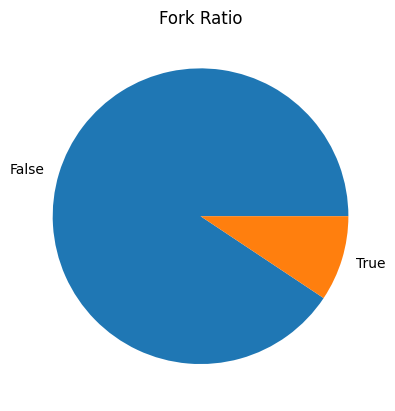

In [38]:
plt.pie(fork.values,labels=fork.index)
plt.title('Fork Ratio')
plt.show()

In [78]:
_df['languages'] = _df['languages'].map(lambda x: x.replace('\'','"').replace('\t','').replace('\n','').replace(',}','}').replace(',]',']'))

In [79]:
_df['languages']

0                                       {"Ruby": 219981}
1                   {"Ruby": 948883, "JavaScript": 8925}
2      {"C": 23606977, "Ruby": 10652649, "C++": 32619...
3      {"Ruby": 283939, "C": 9261, "CSS": 6486, "Java...
4                   {"JavaScript": 126588, "Ruby": 9677}
                             ...                        
102                                       {"Ruby": 4062}
103            {"Ruby": 88388, "HTML": 8678, "CSS": 927}
104           {"Ruby": 35135, "HTML": 4167, "CSS": 1014}
105          {"CSS": 39650, "Ruby": 36125, "HTML": 1708}
106                                    {"Python": 12368}
Name: languages, Length: 107, dtype: object

In [80]:
import ast
languages = dict()
for i in map(ast.literal_eval,iter(_df['languages'])):
    for k,v in i.items():
        l = languages.get(k)
        if l:
            val = l+v
        else: val = v
        languages.update({k:val})


In [81]:
languages

{'Ruby': 30820590,
 'JavaScript': 2250692,
 'C': 23703084,
 'C++': 3261903,
 'Shell': 1336687,
 'Makefile': 905013,
 'Assembly': 787717,
 'Objective-C': 643227,
 'TeX': 393275,
 'Roff': 224519,
 'M4': 143616,
 'Ada': 89080,
 'Pascal': 70297,
 'C#': 55626,
 'HTML': 116977,
 'DIGITAL Command Language': 27303,
 'Perl': 21024,
 'CMake': 17089,
 'DTrace': 7173,
 'Python': 168453,
 'CLIPS': 5291,
 'Batchfile': 4779,
 'SAS': 1847,
 'Module Management System': 1545,
 'PHP': 1550,
 'GDB': 383,
 'VBScript': 294,
 'CSS': 184498,
 'ActionScript': 4239,
 'Ragel': 5790,
 'CoffeeScript': 13,
 'Erlang': 1612549,
 'Emacs Lisp': 16124,
 'Java': 7170,
 'Groff': 2026,
 'Arc': 203354,
 'Scheme': 79849,
 'Bison': 965,
 'Io': 16836}

In [87]:
import heapq
top_languages = heapq.nlargest(5, languages, key=languages.get)
top_languages.reverse()


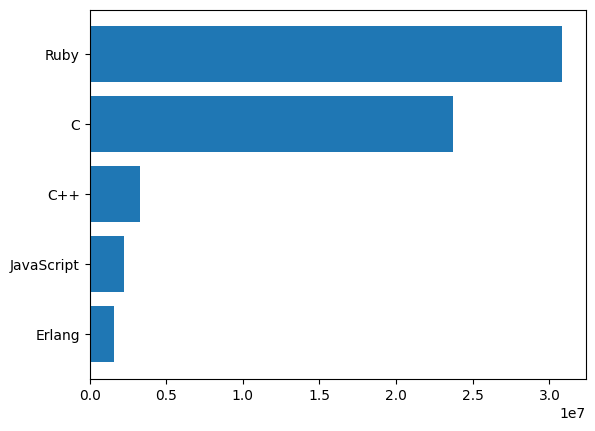

In [88]:
plt.barh(top_languages,[languages.get(i) for i in top_languages])
plt.show()

In [103]:
most_fork = _df.sort_values(by=['forks'],ascending=False)

In [104]:
forks = most_fork[['full_name','forks']].head(10)

In [105]:
forks

,full_name,forks
88,josh/rails,20714.0
26,bmizerany/sinatra,2072.0
2,rubinius/rubinius,604.0
94,collectiveidea/audited,597.0
0,mojombo/grit,542.0
34,ruby-git/ruby-git,510.0
79,kevinclark/god,508.0
3,mojombo/god,508.0
41,mojombo/chronic,466.0
81,brosner/django-mptt,451.0


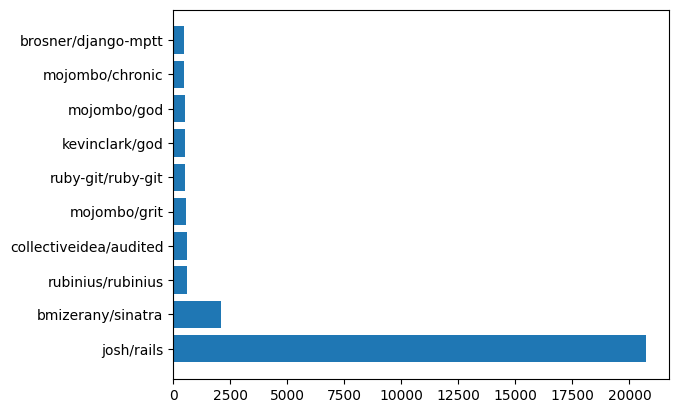

In [107]:
plt.barh(forks['full_name'],forks['forks'])
plt.show()

In [109]:
most_stars = _df.sort_values(by='stars',ascending=False)

In [115]:
stars = most_stars[['full_name','stars']].head(10)

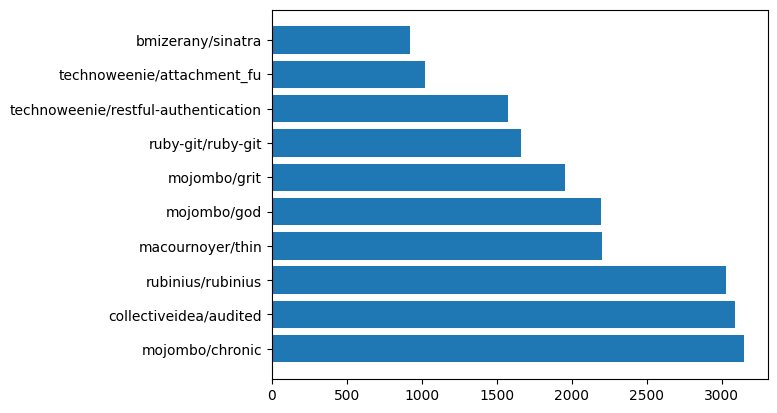

In [116]:
plt.barh(stars['full_name'],stars['stars'])
plt.show()